In [186]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
train  = pd.read_csv("C:/taejunglee/train.csv")
test = pd.read_csv('C:/taejunglee/test.csv')
sub_df = pd.read_csv("C:/taejunglee/gender_submission.csv")


In [188]:
train.shape
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [189]:
train_test = train.append(test)
nan_dict = {"CNT":train_test.isna().sum(),
            "RATE": train_test.isna().sum()/train.shape[0] *100
}
nan_df = pd.DataFrame(nan_dict)
print(nan_df[nan_df["RATE"]>0].sort_values("CNT", ascending=False))


           CNT        RATE
Cabin     1014  113.804714
Survived   418   46.913580
Age        263   29.517396
Embarked     2    0.224467
Fare         1    0.112233


In [190]:
# print(train["Cabin"].head())
print(train_test["Cabin"].describe())   #[nan 'C85' 'C123' 'E46' 'G6']
train["Cabin"].fillna("", inplace=True)
test["Cabin"].fillna("", inplace=True)

train["Cabin_title"] = train["Cabin"].str[:1]
test["Cabin_title"] = test["Cabin"].str[:1]

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object


In [191]:
cross = pd.crosstab(train["Cabin_title"], train["Survived"])
print(cross)

Survived       0    1
Cabin_title          
             481  206
A              8    7
B             12   35
C             24   35
D              8   25
E              8   24
F              5    8
G              2    2
T              1    0


In [192]:
cross = pd.crosstab(train["Cabin_title"], train["Pclass"])
print(cross)

Pclass        1    2    3
Cabin_title              
             40  168  479
A            15    0    0
B            47    0    0
C            59    0    0
D            29    4    0
E            25    4    3
F             0    8    5
G             0    0    4
T             1    0    0


In [193]:
print(train["Age"].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [194]:
train['Name_title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')
test['Name_title'] = test['Name'].str.extract(' ([A-Za-z]+)\.')
print(test['Name_title'].unique())
print(train['Name_title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [195]:
temp_data = pd.concat([train['Name_title'], test['Name_title']])
print(type(temp_data))   #<class 'pandas.core.series.Series'>
temp_data.value_counts()  #1300 , Mr          757  500
# print(temp_data.shape)

<class 'pandas.core.series.Series'>


Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Ms            2
Mlle          2
Dona          1
Mme           1
Don           1
Capt          1
Lady          1
Jonkheer      1
Sir           1
Countess      1
Name: Name_title, dtype: int64

In [196]:
name_title_dict = {
'Mr':1,
'Mrs':2, 'Mme':2,
'Miss':3, 'Lady':3, 'Ms' :3,'Mlle':3,
'Master':4 ,
    'Don':5 , 'Dona':5, 'Rev':6 , 'Dr':7 , 'Major':8 ,
 'Sir':9, 'Col':10, 'Capt':11, 'Countess':12, 'Jonkheer':13
}
train['Name_title'] = train['Name_title'].map(name_title_dict)
test['Name_title'] = test['Name_title'].map(name_title_dict)
print(train['Name_title'].head())

0    1
1    2
2    3
3    2
4    1
Name: Name_title, dtype: int64


In [197]:
train["Age"].fillna(train.groupby("Name_title")["Age"].transform("mean"), inplace=True)
test["Age"].fillna(test.groupby("Name_title")["Age"].transform("mean"), inplace=True)
print(train["Age"].unique())

[22.         38.         26.         35.         32.36809045 54.
  2.         27.         14.          4.         58.         20.
 39.         55.         31.         35.78899083 34.         15.
 28.          8.         19.         22.02       40.         66.
 42.         21.         18.          3.          7.         49.
 29.         65.         28.5         5.         11.         45.
  4.57416667 17.         32.         16.         25.          0.83
 30.         33.         23.         24.         46.         59.
 71.         37.         47.         14.5        70.5        32.5
 12.          9.         36.5        51.         55.5        40.5
 44.          1.         61.         56.         50.         36.
 45.5        20.5        62.         41.         52.         63.
 23.5         0.92       43.         60.         10.         64.
 13.         48.          0.75       53.         57.         80.
 70.         24.5         6.          0.67       30.5         0.42
 34.5        74.   

In [198]:
# train['T_MR'] = train['Name_title']==Mr 1  0
train["T_MR"] = train["Name_title"].apply(lambda x:  1 if x == "Mr" else 0)
test["T_MR"] = test["Name_title"].apply(lambda x:  1 if x == "Mr" else 0)
test["T_MR"][:5]

0    0
1    0
2    0
3    0
4    0
Name: T_MR, dtype: int64

In [199]:
temp_data = pd.concat([train['Embarked'], test['Embarked']])
temp_data.describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [200]:
print(train["Embarked"].unique())

['S' 'C' 'Q' nan]


In [201]:
# test["Embarked"] = test["Embarked"].fillna(mode_value) #  , inplace=True)


In [202]:
mode_value = 'S'
train["Embarked"].fillna(mode_value, inplace=True)
test["Embarked"].fillna(mode_value, inplace=True)
# train["Embarked"] = train["Embarked"].replace(np.nan, 'S')
# test["Embarked"] = test["Embarked"].replace(np.nan, 'S')

In [203]:
print(train["Embarked"].unique())

['S' 'C' 'Q']


In [204]:
fare_mean = train["Fare"].mean()

In [205]:
train["Fare"].fillna(fare_mean, inplace=True)
test["Fare"].fillna(fare_mean, inplace=True)

In [206]:
print(train.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Cabin_title    0
Name_title     0
T_MR           0
dtype: int64


In [207]:
print(test.isna().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Cabin_title    0
Name_title     0
T_MR           0
dtype: int64


In [208]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Cabin_title  891 non-null    object 
 13  Name_title   891 non-null    int64  
 14  T_MR         891 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB


In [209]:
train[["Embarked","Sex"]].describe()

,Embarked,Sex
count,891,891
unique,3,2
top,S,male
freq,646,577


In [210]:
# temp = pd.concat([train, test])
train_test = [train, test]
for df in train_test:
#   1. map
    sex_dict = {'male':1,'female':0}
    df['T_sex'] = df['Sex'].map(sex_dict)
    
    emb_dict = {'Q':0 , 'S':1 , 'C':2}
    df['T_embarked'] = df['Embarked'].map(emb_dict)

    df["T_family"] = (df["SibSp"] + df["Parch"]) + 1
#     print(train['T_sex'].head())
    
#     2. lambda
#     train["T_sex2"] = train["Sex"].apply(lambda x:  1 if x == "male" else 0)
#     print(train['T_sex'].head())
    
#     3. replace
#     train["T_sex3"] = train["Sex"].replace('male', 1)
#     train["T_sex3"] = train["T_sex3"].replace('female', 0)
#     print(train['T_sex3'].head())

In [211]:
train[['T_embarked','Embarked']].head()

,T_embarked,Embarked
0,1,S
1,2,C
2,1,S
3,1,S
4,1,S


In [212]:
float_features_list = train.dtypes[train.dtypes == 'float64'].index.values
print(float_features_list)
train[float_features_list] = train[float_features_list].astype(np.int32)
test[float_features_list] = test[float_features_list].astype(np.int32)

['Age' 'Fare']


In [213]:
object_features_list = train.dtypes[train.dtypes == 'object'].index.values
print(object_features_list)

['Name' 'Sex' 'Ticket' 'Cabin' 'Embarked' 'Cabin_title']


In [214]:
train.drop(object_features_list, axis=1, inplace=True)
test.drop(object_features_list, axis=1, inplace=True)

In [215]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Age          891 non-null    int32
 4   SibSp        891 non-null    int64
 5   Parch        891 non-null    int64
 6   Fare         891 non-null    int32
 7   Name_title   891 non-null    int64
 8   T_MR         891 non-null    int64
 9   T_sex        891 non-null    int64
 10  T_embarked   891 non-null    int64
 11  T_family     891 non-null    int64
dtypes: int32(2), int64(10)
memory usage: 76.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Age       

In [216]:

train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

In [217]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# XGBoost python wrapper class
# ref : https://injo.tistory.com/44
# ref : https://velog.io/@dbj2000/ML
import xgboost as xgb ## XGBoost 불러오기

#LightGBM
# ref : https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score

In [218]:
train_y = train["Survived"]
train_X = train.drop("Survived", axis=1)
print(train_y.shape, train_X.shape)

(891,) (891, 10)


In [219]:
문제_학습8, 문제_검증2, 답안_학습8, 답안_검증2 = train_test_split(train_X, train_y, test_size=0.2, random_state=36,  shuffle=False)
print(문제_학습8.shape, 문제_검증2.shape, 답안_학습8.shape, 답안_검증2.shape)

(712, 10) (179, 10) (712,) (179,)


In [220]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()

In [221]:
dt.fit(문제_학습8, 답안_학습8)
내가낸답안2 = dt.predict(문제_검증2)
df_score = accuracy_score(내가낸답안2 ,  답안_검증2)
print(df_score)     # 0.7541899441340782  float 
                    # 0.7653631284916201  int

0.7597765363128491


In [222]:
train_X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pclass      891 non-null    int64
 1   Age         891 non-null    int32
 2   SibSp       891 non-null    int64
 3   Parch       891 non-null    int64
 4   Fare        891 non-null    int32
 5   Name_title  891 non-null    int64
 6   T_MR        891 non-null    int64
 7   T_sex       891 non-null    int64
 8   T_embarked  891 non-null    int64
 9   T_family    891 non-null    int64
dtypes: int32(2), int64(8)
memory usage: 62.8 KB


In [223]:
imp_df = pd.DataFrame({"featuer" : train_X.columns, "importance" : dt.feature_importances_})
imp_df.sort_values('importance', ascending=False).T

,5,1,4,0,9,8,3,2,7,6
featuer,Name_title,Age,Fare,Pclass,T_family,T_embarked,Parch,SibSp,T_sex,T_MR
importance,0.365499,0.238435,0.159299,0.107453,0.0602931,0.0294101,0.0178759,0.0174128,0.00432222,0


In [224]:
train_X["Fare"] = train["Fare"]
train_X["Family_fare"] = train_X["Fare"]/ train_X["T_family"]
test["Family_fare"] = test["Fare"]/ test["T_family"]

In [225]:
train_X["T_Fare"] = train_X["Fare"].apply(lambda x : x//14)
train_X["T_Fare"] = train_X["T_Fare"].astype(int)
test["T_Fare"] = test["Fare"].apply(lambda x : x//14)
test["T_Fare"] = test["T_Fare"].astype(int)
print(train_X[["T_Fare","Fare"]].head(8))

print(train_X.info())

   T_Fare  Fare
0       0     7
1       5    71
2       0     7
3       3    53
4       0     8
5       0     8
6       3    51
7       1    21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Age          891 non-null    int32  
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    int32  
 5   Name_title   891 non-null    int64  
 6   T_MR         891 non-null    int64  
 7   T_sex        891 non-null    int64  
 8   T_embarked   891 non-null    int64  
 9   T_family     891 non-null    int64  
 10  Family_fare  891 non-null    float64
 11  T_Fare       891 non-null    int32  
dtypes: float64(1), int32(3), int64(8)
memory usage: 73.2 KB
None


In [226]:
def myfit(X, y, model, imp=0, tsize=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=36,  shuffle=False)
    #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    df_score = accuracy_score(pred ,  y_test)
    print("Accuracy : {:.6f}".format(df_score))     
    if imp==1:         
        imp_df = pd.DataFrame({"featuer" : train_X.columns, "importance" : model.feature_importances_})
        imp_df = imp_df.sort_values('importance', ascending=False).T
        print(imp_df)

In [227]:
myfit(train_X, train_y, dt)

Accuracy : 0.748603


In [228]:
train_X.drop(["Fare"], inplace=True, axis=1)
test.drop(["Fare"], inplace=True, axis=1)

In [229]:
myfit(train_X, train_y, dt, 1)

Accuracy : 0.765363
                    4         1            9          0          8   \
featuer     Name_title       Age  Family_fare     Pclass   T_family   
importance    0.359888  0.249798     0.148809  0.0931199  0.0726488   

                    7          10          2           3     5      6   
featuer     T_embarked     T_Fare       SibSp       Parch  T_MR  T_sex  
importance   0.0378239  0.0299913  0.00630047  0.00162083     0      0  


In [230]:
temp = train_X.copy()
temp = temp.join(train_y)
temp.head()

,Pclass,Age,SibSp,Parch,Name_title,T_MR,T_sex,T_embarked,T_family,Family_fare,T_Fare,Survived
0,3,22,1,0,1,0,1,1,2,3.5,0,0
1,1,38,1,0,2,0,0,2,2,35.5,5,1
2,3,26,0,0,3,0,0,1,1,7.0,0,1
3,1,35,1,0,2,0,0,1,2,26.5,3,1
4,3,35,0,0,1,0,1,1,1,8.0,0,0


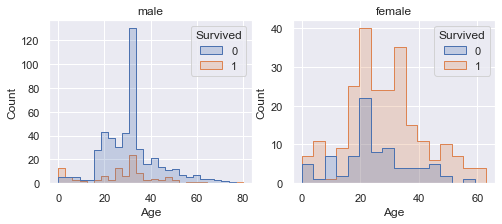

In [231]:
sns.set()
fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = sns.histplot(temp[temp["T_sex"]==1], x="Age", hue="Survived", element="step", ax=axes[0])
ax.set_title("male")
ax = sns.histplot(temp[temp["T_sex"]==0], x="Age", hue="Survived", element="step", ax=axes[1])
ax.set_title("female")
plt.show()

In [232]:
def age_bining(x) :  #df["Age"]
    T_Age = 0
    if x>0 & x <= 17:
        T_Age = 1
    elif x>17 & x <= 38:
        T_Age = 2
    elif  x>38 & x <= 60:
        T_Age = 3
    else:
        T_Age = 4
    return  T_Age   
train_X["T_Age"] = train_X["Age"].apply(lambda x : age_bining(x))

In [233]:
myfit(train_X, train_y, dt)

Accuracy : 0.770950


In [234]:
train_X["T_Age"] = train_X["Age"].apply(lambda x : x//5)
train_X["T_Age"] = train_X["T_Age"].astype(int)
# test["T_Age"] = train_X["Age"].apply(lambda x : x//5)
# test["T_Age"] = train_X["T_Age"].astype(int)
print(train_X[["T_Age","Age"]].head(8))

   T_Age  Age
0      4   22
1      7   38
2      5   26
3      7   35
4      7   35
5      6   32
6     10   54
7      0    2


In [235]:
myfit(train_X, train_y, dt)

Accuracy : 0.770950


In [236]:
train_X.drop(["Age"], inplace=True, axis=1)

In [237]:
myfit(train_X, train_y, dt, 1) 

Accuracy : 0.798883
                    3            8         10        0          7   \
featuer     Name_title  Family_fare     T_Age    Pclass   T_family   
importance    0.390236     0.195649  0.145579  0.101192  0.0644608   

                    6         9           1           5           2     4   
featuer     T_embarked    T_Fare       SibSp       T_sex       Parch  T_MR  
importance   0.0466072  0.040363  0.00837595  0.00467102  0.00286631     0  


In [238]:
models = [dt,rf] #,lr,knn ]
for model in models:
    print(model.__class__)
    myfit(train_X, train_y, model, 1)  #0.810056  //  0.815642

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Accuracy : 0.804469
                    3            8         10        0          7          9   \
featuer     Name_title  Family_fare     T_Age    Pclass   T_family     T_Fare   
importance    0.399514     0.201334  0.148541  0.100258  0.0644627  0.0366845   

                    6           1           2            5     4   
featuer     T_embarked       SibSp       Parch        T_sex  T_MR  
importance   0.0325941  0.00819882  0.00812121  0.000291939     0  
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy : 0.832402
                    3            8         10        5          0          9   \
featuer     Name_title  Family_fare     T_Age     T_sex     Pclass     T_Fare   
importance    0.195081     0.179809  0.171955  0.159048  0.0784091  0.0668225   

                  7           6         1          2     4   
featuer     T_family  T_embarked     SibSp      Parch  T_MR  
importance  0.056032   0.038268

In [239]:
train_X["T_fare_per_one"] = train_X["T_Fare"] / train_X["T_family"]
test["T_fare_per_one"] = test["T_Fare"] / test["T_family"]

In [240]:
myfit(train_X, train_y, model, 1)

Accuracy : 0.815642
                    3         10        5            8          0   \
featuer     Name_title     T_Age     T_sex  Family_fare     Pclass   
importance    0.183797  0.168681  0.166804     0.165651  0.0692889   

                        11         7          9           6          1   \
featuer     T_fare_per_one   T_family     T_Fare  T_embarked      SibSp   
importance       0.0605935  0.0468731  0.0468274   0.0431273  0.0279333   

                   2     4   
featuer         Parch  T_MR  
importance  0.0204236     0  


In [241]:
train_X["T_fare_per_one"].nunique()

36

In [246]:
train_X["T_fare_per_one"] = (train_X["T_Fare"] / train_X["T_family"]).astype(int)
test["T_fare_per_one"]    = (test["T_Fare"] / test["T_family"]).astype(int)

In [247]:
train_X["T_fare_per_one"].nunique()

15

In [248]:
myfit(train_X, train_y, model, 1)

Accuracy : 0.826816
                    3            8         5         10         0          9   \
featuer     Name_title  Family_fare     T_sex     T_Age     Pclass     T_Fare   
importance    0.185337     0.183685  0.166425  0.165408  0.0613244  0.0564504   

                   7           6          1               11         2     4   
featuer      T_family  T_embarked      SibSp  T_fare_per_one      Parch  T_MR  
importance  0.0556206   0.0439363  0.0313312       0.0312158  0.0192675     0  


<AxesSubplot:xlabel='feature'>

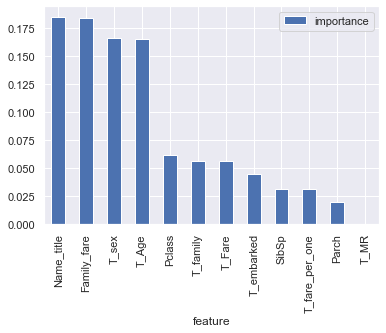

In [249]:
importances = pd.DataFrame({'feature':train_X.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15).T
importances.plot.bar()


In [250]:
train_X.drop(["T_MR"], inplace=True, axis=1)
test.drop(['T_MR'], axis=1, inplace=True)

In [251]:

myfit(train_X, train_y, rf,1)

Accuracy : 0.832402
                    3         4            7         9          0          6   \
featuer     Name_title     T_sex  Family_fare     T_Age     Pclass   T_family   
importance    0.182693  0.172439     0.171327  0.168928  0.0647647  0.0636386   

                   8           5          1               10         2   
featuer        T_Fare  T_embarked      SibSp  T_fare_per_one      Parch  
importance  0.0551641   0.0402303  0.0330379       0.0299127  0.0178643  


In [256]:
from sklearn.ensemble import VotingClassifier

models = [('DT',dt), ('LR',lr), ('KNN',knn)]
vot = VotingClassifier(models, voting='hard' )   # weights=None
myfit(train_X, train_y, vot) 

AttributeError: 'str' object has no attribute 'decode'

In [255]:
models = [('DT',dt), ('LR',lr), ('KNN',knn)]
for model in models:
    print(model[0])
    myfit(train_X, train_y, model[1])  

DT
Accuracy : 0.810056
LR


AttributeError: 'str' object has no attribute 'decode'

In [257]:
my_param = {"n_estimators":[100,300,500],
            "max_depth":[1,2,3,4,5],
            "min_samples_split":[1,2,3]
            }
bagg100 = RandomForestClassifier(n_estimators=100,max_depth=1)  #0.804469
myfit(train_X, train_y, bagg100)

Accuracy : 0.798883


In [258]:
bagg = RandomForestClassifier(n_estimators=100,max_depth=10)  # 0.865922
myfit(train_X, train_y, bagg)

Accuracy : 0.837989


In [259]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

N_SPLIT = 5
# kfold = KFold(n_splits=5, shuffle=True, random_state=131)
kfold = KFold(n_splits=N_SPLIT, shuffle=False)
scores = []
for train_index, test_index in kfold.split(train_X):  #-----------StratifiedKFold
    print("TRAIN:", len(train_index) , "TEST:", len(test_index))
    X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
    y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]
    bagg.fit(X_train, y_train)
    pred = bagg.predict(X_test)
    df_score = accuracy_score(pred, y_test)
    scores.append(df_score)
    print("Accuracy : {:.6f}".format(df_score))
print("{:d}회 평균 Accuracy:{:.4f}".format(N_SPLIT, np.array(scores).mean()))

TRAIN: 712 TEST: 179
Accuracy : 0.821229
TRAIN: 713 TEST: 178
Accuracy : 0.803371
TRAIN: 713 TEST: 178
Accuracy : 0.848315
TRAIN: 713 TEST: 178
Accuracy : 0.808989
TRAIN: 713 TEST: 178
Accuracy : 0.853933
5회 평균 Accuracy:0.8272


In [260]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5, shuffle=False)
scores = []
for train_index, test_index in skfold.split(train_X, train_y):
    print("TRAIN:", len(train_index) , "TEST:", len(test_index))
    X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
    y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]
    bagg.fit(X_train, y_train)
    pred = bagg.predict(X_test)
    df_score = accuracy_score(pred, y_test)
    scores.append(df_score)
    print("Accuracy : {:.6f}".format(df_score))
print("{:d}회 평균 Accuracy:{:.4f}".format(N_SPLIT,  np.array(scores).mean())) 

TRAIN: 712 TEST: 179
Accuracy : 0.821229
TRAIN: 713 TEST: 178
Accuracy : 0.803371
TRAIN: 713 TEST: 178
Accuracy : 0.859551
TRAIN: 713 TEST: 178
Accuracy : 0.820225
TRAIN: 713 TEST: 178
Accuracy : 0.848315
5회 평균 Accuracy:0.8305


In [261]:
from sklearn.model_selection import cross_val_score

In [262]:
scores_list = cross_val_score(rf, train_X, train_y, cv=5, scoring="accuracy")

In [263]:
print(scores_list)

[0.79888268 0.79775281 0.85393258 0.80337079 0.84269663]


In [264]:
print(scores_list.mean())

0.819327098110602


## GridSearchCV : 하이퍼파라미터 튜닝

In [265]:
from sklearn.model_selection import GridSearchCV

In [266]:
my_param = {"n_estimators":[100,300,500],
           "max_depth":[1,2,3,4,5],
           "min_samples_split":[1,2,3]}
gcv = GridSearchCV(rf, param_grid=my_param, scoring="accuracy",refit=True, cv=5)
# rf = RandomForest("n_estimators"=100, "max_depth"=4, "min_samples_split=3")

In [267]:
gcv.fit(train_X,train_y)

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [268]:
bagg = RandomForestClassifier(n_estimators=100,max_depth=10)  # 0.865922
myfit(train_X, train_y, bagg)

Accuracy : 0.849162


In [269]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

N_SPLIT = 5
# kfold = KFold(n_splits=5, shuffle=True, random_state=131)
kfold = KFold(n_splits=N_SPLIT, shuffle=False)
scores = []
for train_index, test_index in kfold.split(train_X):  #-----------StratifiedKFold
    print("TRAIN:", len(train_index) , "TEST:", len(test_index))
    X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
    y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]
    bagg.fit(X_train, y_train)
    pred = bagg.predict(X_test)
    df_score = accuracy_score(pred, y_test)
    scores.append(df_score)
    print("Accuracy : {:.6f}".format(df_score))
print("{:d}회 평균 Accuracy:{:.4f}".format(N_SPLIT, np.array(scores).mean()))

TRAIN: 712 TEST: 179
Accuracy : 0.815642
TRAIN: 713 TEST: 178
Accuracy : 0.808989
TRAIN: 713 TEST: 178
Accuracy : 0.842697
TRAIN: 713 TEST: 178
Accuracy : 0.814607
TRAIN: 713 TEST: 178
Accuracy : 0.859551
5회 평균 Accuracy:0.8283


In [270]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5, shuffle=False)
scores = []
for train_index, test_index in skfold.split(train_X, train_y):
    print("TRAIN:", len(train_index) , "TEST:", len(test_index))
    X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
    y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]
    bagg.fit(X_train, y_train)
    pred = bagg.predict(X_test)
    df_score = accuracy_score(pred, y_test)
    scores.append(df_score)
    print("Accuracy : {:.6f}".format(df_score))
print("{:d}회 평균 Accuracy:{:.4f}".format(N_SPLIT,  np.array(scores).mean()))

TRAIN: 712 TEST: 179
Accuracy : 0.832402
TRAIN: 713 TEST: 178
Accuracy : 0.797753
TRAIN: 713 TEST: 178
Accuracy : 0.853933
TRAIN: 713 TEST: 178
Accuracy : 0.803371
TRAIN: 713 TEST: 178
Accuracy : 0.848315
5회 평균 Accuracy:0.8272


In [271]:
from sklearn.model_selection import cross_val_score

In [272]:
scores_list = cross_val_score(rf, train_X, train_y, cv=5, scoring="accuracy")

In [273]:
print(scores_list)
print(scores_list.mean())

[0.79329609 0.78089888 0.8258427  0.80337079 0.82022472]
0.8047266336074321


In [274]:
from sklearn.model_selection import GridSearchCV

In [275]:
my_param = {"n_estimators":[100,300,500],
            "max_depth":[1,2,3,4,5],
            "min_samples_split":[1,2,3]
            }
gcv = GridSearchCV(rf , param_grid=my_param, scoring='accuracy', refit=True, cv=5)

In [277]:
gcv.fit(train_X, train_y)

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [278]:
print(gcv.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [279]:
print(gcv.cv_results_["mean_test_score"])

[       nan        nan        nan 0.77781056 0.77781684 0.77107526
 0.77669324 0.79236081 0.78336576        nan        nan        nan
 0.79352834 0.81143054 0.81030695 0.80362187 0.79800389 0.81255414
        nan        nan        nan 0.82378382 0.82153663 0.82153663
 0.82265395 0.82153663 0.82153663        nan        nan        nan
 0.8215429  0.82491369 0.82491997 0.82827192 0.82603101 0.82603101
        nan        nan        nan 0.82491369 0.82490741 0.82379009
 0.82603729 0.82603101 0.82938924]


In [280]:
print(gcv.best_score_)

0.8293892411022534


In [281]:
print(gcv.best_params_)

{'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 500}


In [282]:
pred_for_submit = gcv.predict(test)

In [283]:
print(pred_for_submit)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [284]:
print(sub_df.shape,  len(pred_for_submit))
sub_df["Survived"] = np.array(pred_for_submit).reshape(-1,1)
print(sub_df.head())

(418, 2) 418
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


In [285]:
mydic = {"PassengerId" : sub_df["PassengerId"].values,
 "Survived" : pred_for_submit }

final_df = pd.DataFrame(mydic)
final_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [286]:
mypredict = np.zeros(sub_df.shape[0]).astype(int)
sub_df["Survived"] = np.array(mypredict).reshape(-1,1)
print(sub_df.head())
sub_df.to_csv("zeros_submission.csv", index=False)

mypredict = np.ones(sub_df.shape[0]).astype(int)
sub_df["Survived"] = np.array(mypredict).reshape(-1,1)
print(sub_df.head())
sub_df.to_csv("ones_submission.csv", index=False)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
   PassengerId  Survived
0          892         1
1          893         1
2          894         1
3          895         1
4          896         1


In [ ]:
final_df.to_csv("ltj_submission.csv",index=False)

In [287]:
print(gcv.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [288]:
print(gcv.best_score_)

0.8293892411022534


In [289]:
print(gcv.best_params_)

{'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 500}


In [290]:
pred = gcv.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print("accuracy:{:.4f}".format(accuracy))

accuracy:0.8708


In [291]:
print(sub_df.shape, len(pred_for_submit))
sub_df["Survived"] = np.array(pred_for_submit).reshape(-1,1)
print(sub_df.head())

(418, 2) 418
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


In [292]:
mydic = {"PassengerID": sub_df["Survived"].values,
"Survived" : pred_for_submit}

final_df = pd.DataFrame(mydic)
final_df.head()

,PassengerID,Survived
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [293]:
final_df.to_csv("ltj_submission.csv",index=False)